In [312]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans as Clst
from sklearn.preprocessing import MinMaxScaler as MX

In [313]:
df = pd.read_csv('./merged-data.csv')
df.replace(9999.99, 0, inplace=True)
df.head()

,year,month,bx_gsm,by_gsm,bz_gsm,bt,intensity,declination,inclination,north,east,vertical,horizontal
0,2015,6,18.80,15.86,0.08,0.23,57265,85.368,89.712,23,287,57264,288
1,2015,6,16.80,11.17,1.35,3.37,57265,85.368,89.712,23,287,57264,288
2,2015,6,17.14,10.45,0.69,2.84,57265,85.368,89.712,23,287,57264,288
3,2015,6,16.26,7.73,1.32,3.12,57265,85.368,89.712,23,287,57264,288
4,2015,6,17.11,8.73,0.80,2.66,57265,85.368,89.712,23,287,57264,288


In [314]:
scaler = MX()
df[['bx_gsm']] = scaler.fit_transform(df[['bx_gsm']])
df[['by_gsm']] = scaler.fit_transform(df[['by_gsm']])
df[['bz_gsm']] = scaler.fit_transform(df[['bz_gsm']])
df[['bt']] = scaler.fit_transform(df[['bt']])
df[['intensity']] = scaler.fit_transform(df[['intensity']])
df[['declination']] = scaler.fit_transform(df[['declination']])
df[['inclination']] = scaler.fit_transform(df[['inclination']])
df[['north']] = scaler.fit_transform(df[['north']])
df[['east']] = scaler.fit_transform(df[['east']])
df[['vertical']] = scaler.fit_transform(df[['vertical']])
df[['horizontal']] = scaler.fit_transform(df[['horizontal']])
df.head()

,year,month,bx_gsm,by_gsm,bz_gsm,bt,intensity,declination,inclination,north,east,vertical,horizontal
0,2015,6,0.480818,1.000000,0.008448,0.015689,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,2015,6,0.429668,0.858692,0.142555,0.229877,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,2015,6,0.438363,0.836999,0.072862,0.193724,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,2015,6,0.415857,0.755047,0.139388,0.212824,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,2015,6,0.437596,0.785176,0.084477,0.181446,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [315]:
krng = range(1,13)
sse = []
for i in krng:
    clusterer = Clst(n_clusters=i)
    clusterer.fit(df[df.columns.values])
    sse.append(clusterer.inertia_)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [316]:
for err in sse:
    print(err)
print()
print("min:",np.min(sse))

492965.1636398188
172942.3309790144
113386.36127150114
89096.55841386045
74268.93028837688
62050.645382755145
50952.75381456685
39092.85040594687
35288.12055826735
32132.32226926031
28661.624413507925
26782.50464042561

min: 26782.50464042561


Text(0, 0.5, 'k')

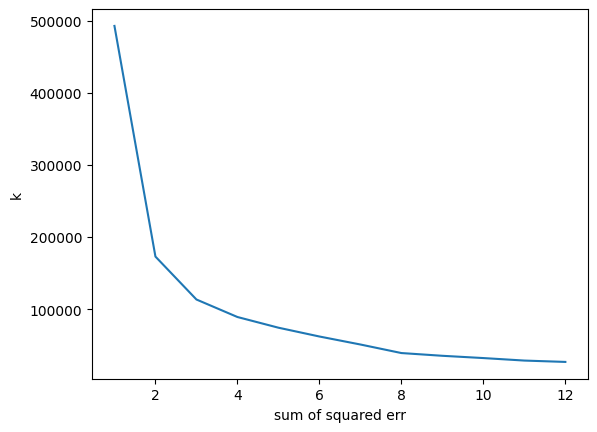

In [317]:
plt.plot(krng,sse)
plt.xlabel('sum of squared err')
plt.ylabel('k')

In [318]:
clusterer = Clst(n_clusters=4)
y_predicted = clusterer.fit_predict(df[df.columns.values])
df['class'] = y_predicted

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [319]:
df.head()

,year,month,bx_gsm,by_gsm,bz_gsm,bt,intensity,declination,inclination,north,east,vertical,horizontal,class
0,2015,6,0.480818,1.000000,0.008448,0.015689,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
1,2015,6,0.429668,0.858692,0.142555,0.229877,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
2,2015,6,0.438363,0.836999,0.072862,0.193724,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
3,2015,6,0.415857,0.755047,0.139388,0.212824,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
4,2015,6,0.437596,0.785176,0.084477,0.181446,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0


In [320]:
# check distribution
df['class'].value_counts()

class
2    10269
1     8687
3     8663
0     7920
Name: count, dtype: int64

In [321]:
grouped = df.groupby('class')

result = grouped.agg({'bx_gsm': ['mean', 'median'], 'by_gsm': ['mean', 'median'],
                       'bz_gsm': ['mean', 'median'], 'bt': ['mean', 'median'],
                       'vertical':['mean','median']})
# Rename the columns for clarity
result.columns = ['bx_mean', 'bx_median', 'by_mean',
                   'by_median', 'bz_mean', 'bz_median',
                     'bt_mean', 'bt_median','vt_mean','vt_median']
# Reset the index to make 'class'
result.reset_index(inplace=True)


In [322]:
print(result)

   class   bx_mean  bx_median   by_mean  by_median   bz_mean  bz_median   
0      0  0.143691   0.129668  0.503138   0.493823  0.041679   0.029567  \
1      1  0.126913   0.115601  0.533565   0.536909  0.039857   0.029567   
2      2  0.135053   0.119693  0.505171   0.499548  0.046171   0.033791   
3      3  0.132712   0.118926  0.536916   0.541729  0.044494   0.032735   

    bt_mean  bt_median   vt_mean  vt_median  
0  0.072895   0.059345  0.291152   0.266667  
1  0.062344   0.050477  0.642427   0.706667  
2  0.073881   0.060027  0.507996   0.560000  
3  0.072340   0.059345  0.539990   0.440000  


In [323]:
result['sum_of_medians'] = result['bx_median'] + result['by_median'] + \
    result['bz_median'] + result['bt_median'] + result['vt_median']

# Group by 'class' and calculate the sum
sum_of_medians = result.groupby('class')['sum_of_medians'].sum().reset_index()

sum_of_medians

,class,sum_of_medians
0,0,0.979070
1,1,1.439221
2,2,1.273059
3,3,1.192735


In [324]:
new_df = pd.read_csv('./merged-data.csv')
new_df.replace(9999.99, np.nan, inplace=True)
new_df['class'] = y_predicted
new_df.to_csv('classification.csv')